## Part 1: Iris Dataset

In [1]:
import pandas as pd
import numpy as np

# Load iris data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"])

### 1.1 - Summary Statistics

In [2]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In this dataset, there are **4 features**. **Sepal length, sepal width, petal length, and petal width are numeric features**, and the **name is a nominal class variable/target feature**.

In [3]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1.2 - Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C719B4250>,
      dtype=object)

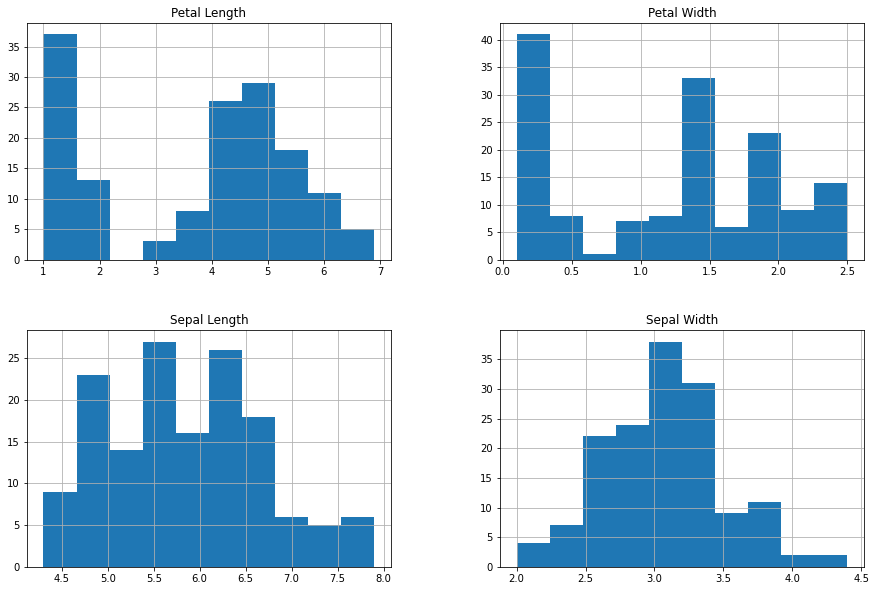

In [4]:
df.hist(figsize=(15,10));

The following 4 cells plot histograms for the 4 numerical features individually.

In [5]:
#df['Sepal Length'].hist()

In [6]:
#df['Sepal Width'].hist()

In [7]:
#df['Petal Length'].hist()

In [8]:
#df['Petal Width'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


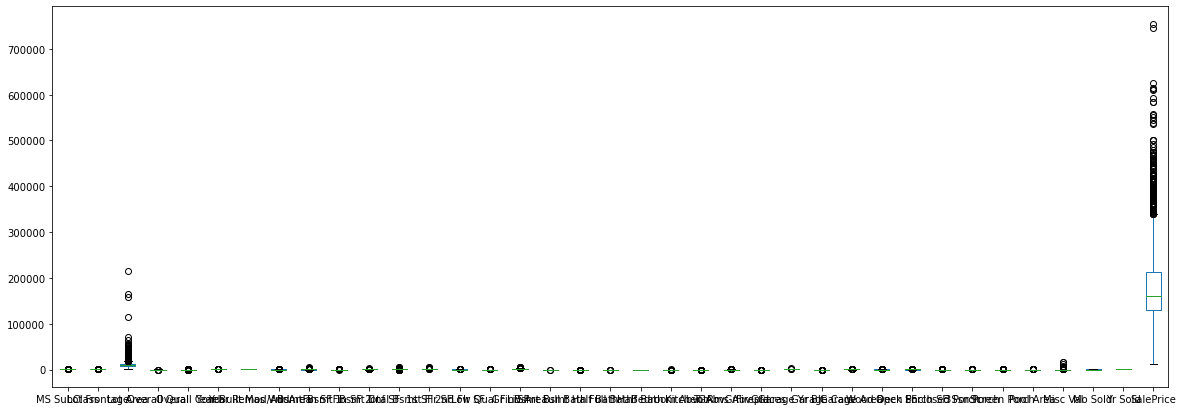

In [35]:
df.boxplot(grid=False, return_type='axes', figsize=(20,7));

---
## Part 2: Ames, Iowa Housing Dataset

In [10]:
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

# Load housing data
pd.set_option("display.max_columns", 100)
url = "https://raw.githubusercontent.com/cs6220/cs6220.spring2019/master/data/AmesHousing.txt"
df = pd.read_csv(url, sep="\t")

In [11]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [12]:
# Drop the Order and PID columns
df = df.drop(['Order', 'PID'], 1)

Since <code>Order</code> and <code>PID</code> are identifiers -- they are neither features nor the target variable -- we should drop them from our dataset.

In [13]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [14]:
# Store features into X and target variable into y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### 2.1 - Imputation

In [15]:
# check_df = df.isnull()
# check_df.head()

In [16]:
cols = [x for x in X.columns]

# Function that finds the number of features with missing value
def missing_val_check(df):
    count = 0
    for col in cols:
        if df[col].isna().sum() > 0:
            count += 1
    return count

missing_count = missing_val_check(X)
print("There are {} features with missing values out of all {} features in the dataset".format(missing_count, len(X.columns)))

There are 27 features with missing values out of all 79 features in the dataset


Of the 79 features in this dataset, **27** are features with missing value, which will require some data preprocessing. Note that the dataset has both nominal and numeric features, which will be handled differently.

The following cell will **replace each missing nominal feature value with the string "Missing"**.

In [17]:
nom_features = []
for col in cols:
    if is_string_dtype(X[col]):
        nom_features.append(col)
# nom_feature

df_imputated = X.copy()
for nom_feature in nom_features:
    # fixed_df[nom_feature] = df[nom_feature].replace(np.nan, 'Missing', regex=True)
    df_imputated[nom_feature] = df_imputated[nom_feature].fillna('Missing')
    
df_imputated.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,141.0,31770,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,Missing,Missing,Missing,0,5,2010,WD,Normal
1,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
3,20,RL,93.0,11160,Pave,Missing,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,Missing,Missing,Missing,0,4,2010,WD,Normal
4,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal


In [18]:
missing_count = missing_val_check(df_imputated)
print(missing_count)

11


After imputation on the nominal features, there are still 11 numeric features with missing value (in other words, previously, there were 27-11=16 nominal features with missing value). We'll have to handle these numeric features as well.

The following cell will **interpolate each missing numeric feature value using linear interpolation**.

In [19]:
num_features = []
for col in cols:
    if is_numeric_dtype(X[col]):
        num_features.append(col)
# num_features

for num_feature in num_features:
    df_imputated[num_feature] = df_imputated[num_feature].interpolate()

In [20]:
missing_count = missing_val_check(df_imputated)
print(missing_count)

0


By running the missing-value check after our imputation steps, we can observe that the count has become 0 -- no feature has missing values anymore.

### 2.2 - Standardization

In [21]:
from sklearn.preprocessing import scale

In [22]:
df_norm = df_imputated.copy()

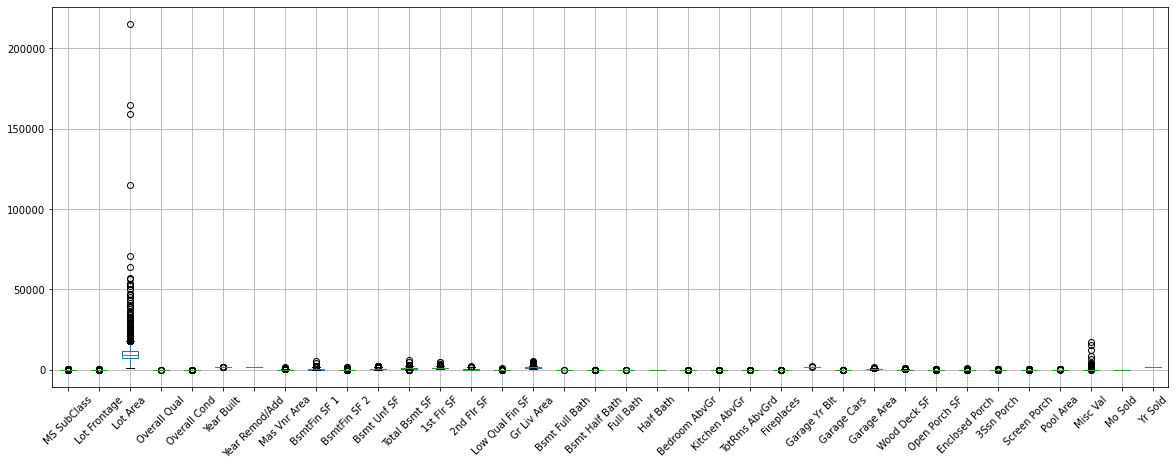

In [23]:
# Boxplot before standardization
# df_norm.plot(kind='box', subplots=True, layout=(20,2), figsize=(15,80), fontsize='16', sharex=False, sharey=False)
# plt.show()
df_norm.boxplot(rot=45, figsize=(20,7));

In [24]:
# Normalize using scale() from scikit-learn
for column in df_norm:
    if column in num_features:
        df_norm[column] = scale(df_norm[column])

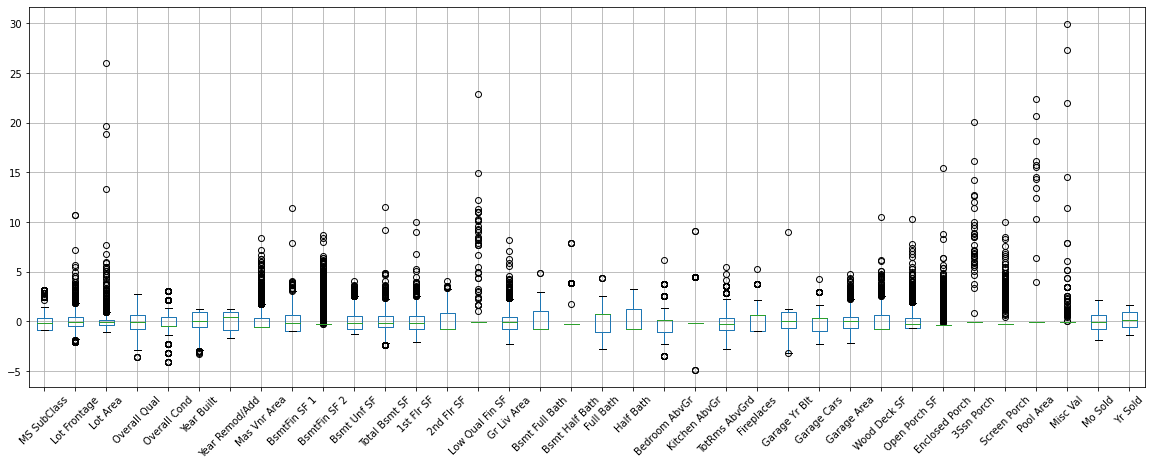

In [25]:
# Boxplot after standardization
# df_norm.plot(kind='box', subplots=True, layout=(20,2), figsize=(15,80), fontsize='16', sharex=False, sharey=False)
# plt.show()
df_norm.boxplot(rot=45, figsize=(20,7));

From the before-and-after boxplot comparison above, we can observe that **the boxplots are different in the y-scale** -- the values for all numeric features are scaled down to around the 0. This allows us to make an easier comparison to observe which feature has outlier furtherest from the man of 0.

In this case, 
1. Before normalization, **the feature with the furtherest outlier from the mean is "Lot Area"**, whose outlier exceeeds 200,000 before scaling.
2. After normalization, **the feature with the furtherest outlier from the mean is "Misc Val"**, whose outlier extends to around 30 after scaling.

### 2.3 - Feature Selection

In [26]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [27]:
# Take only numeric features
X = df_norm.select_dtypes([np.number])
X.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-0.877005,3.128744,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,0.056729,0.431399,-0.293918,-0.269181,0.064758,1.267003,-0.783185,-0.101005,0.309265,1.082555,-0.249782,-1.024793,-0.755203,0.176094,-0.207291,0.354167,2.162180,-0.670221,0.30699,0.257066,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499
1,-0.877005,0.459721,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.570422,0.055976,0.557582,-0.658397,-0.384699,-0.672643,-0.783185,-0.101005,-1.194427,-0.822482,-0.249782,-1.024793,-0.755203,-1.032234,-0.207291,-0.917535,-0.925143,-0.631305,-1.00804,1.196425,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499
2,-0.877005,0.503475,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.034330,1.054908,-0.293918,-0.348845,0.629983,0.432445,-0.783185,-0.101005,-0.337718,-0.822482,-0.249782,-1.024793,1.234675,0.176094,-0.207291,-0.281684,-0.925143,-0.748052,-1.00804,-0.747397,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499
3,-0.877005,1.028529,0.128458,0.641571,-0.506718,-0.110988,-0.779919,-0.570422,1.366663,-0.293918,1.105596,2.402840,2.425687,-0.783185,-0.101005,1.207523,1.082555,-0.249782,0.784028,1.234675,0.176094,-0.207291,0.990018,2.162180,-0.358895,0.30699,0.229164,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499
4,0.061285,0.197194,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.570422,0.765108,-0.293918,-0.961121,-0.280280,-0.590974,0.853432,-0.101005,0.255844,-0.822482,-0.249782,0.784028,1.234675,0.176094,-0.207291,-0.281684,0.618518,0.769662,0.30699,0.043152,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499


In [28]:
y.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

X here now represents all other numeric features, whereas y is still the class column "SalePrice".

In [29]:
mi = mutual_info_regression(X, y)

In [30]:
# Select the 5 best features.
selector = SelectKBest(mutual_info_regression, k=5)
selector.fit(X, y)

# Get indices of columns to keep.
idxs_selected = selector.get_support(indices=True)

# Create new DataFrame with only desired columns.
X_new = X.iloc[:, idxs_selected]

# Show the top 5 features.
print(X_new.head())

   Overall Qual  Year Built  Total Bsmt SF  Gr Liv Area  Garage Area
0     -0.067254   -0.375537       0.064758     0.309265     0.257066
1     -0.776079   -0.342468      -0.384699    -1.194427     1.196425
2     -0.067254   -0.441674       0.629983    -0.337718    -0.747397
3      0.641571   -0.110988       2.402840     1.207523     0.229164
4     -0.776079    0.848000      -0.280280     0.255844     0.043152


Above solution uses the **SelectKBest** function from Sci-kit Learn. Below is my manual solution in extracting the top 5 numberic features ranked by mutual information.

In [31]:
# Create a copy of MI and find index of top 5 numeric features ranked by MI
mi_copy = mi.copy()
mi_copy[::-1].sort()

index_of_top = []
for val in mi_copy[:5]:
    index_of_top.append(np.where(mi == val))

In [32]:
# Get the list of top 5 numeric features
top_features = []
for ind in index_of_top:
    top_features.append(X.columns[ind[0][0]])

In [33]:
top_features

['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Year Built', 'Total Bsmt SF']

From the analysis above, the top 5 numeric features ranked by mutual information are **'Overall Qual', 'Gr Liv Area', 'Garage Area', 'Year Built', and 'Total Bsmt SF'**.

Note that the mutual information are positive values and only tells us the magnitude of dependency. To see whether these attribute more in the same or opposite direction with the SalePrice, we can compute the correlation using correlation matrix.

In [34]:
corr_matrix = df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

From the correlation matrix, we can observe that all top 5 features ranked by mutual information are positively correlated with 'SalePrice' -- 'Overall Qual' (0.799262), 'Gr Liv Area' (0.706780), 'Garage Area' (0.640358), 'Year Built' (0.558426), and 'Total Bsmt SF' (0.632420). This means that **the sales price is expected to go up as their values go up**.